In [1]:
import pandas as pd
import numpy as np

In [2]:
heart_data = pd.read_csv('stroke-data.csv')
heart_data.drop_duplicates(inplace=True)
heart_data.dropna(axis=0, inplace=True)

In [3]:
heart_data = heart_data.drop('id' , axis=1)

In [4]:

heart_data['bmi'] = heart_data['bmi'].replace('N/A', np.nan)
heart_data['bmi'] = pd.to_numeric(heart_data['bmi'])
heart_data['bmi'] = heart_data['bmi'].fillna(heart_data['bmi'].mean())


In [5]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


In [6]:
heart_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [7]:
heart_data = pd.get_dummies(heart_data , columns = ['gender' , 'ever_married' , 'work_type' , 'Residence_type' ,'smoking_status'], drop_first = True) 

In [8]:
heart_data['stroke'] =heart_data['stroke'].astype(int)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

stroke
0    4700
1     209
Name: count, dtype: int64
Class distribution %:
stroke
0    95.742514
1     4.257486
Name: count, dtype: float64


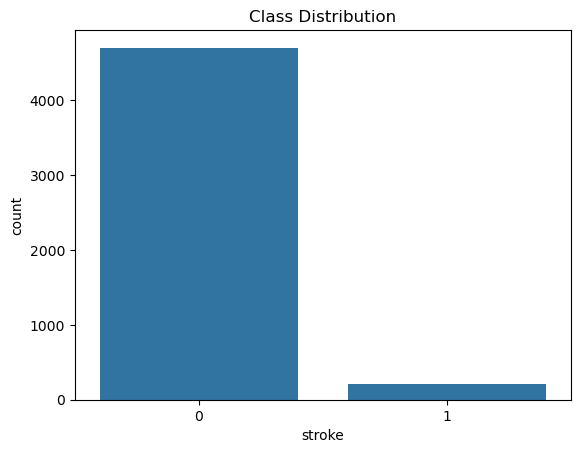

In [10]:
stroke_counts = heart_data['stroke'].value_counts()
print(stroke_counts)
print("Class distribution %:")
print(stroke_counts/ len(heart_data) * 100)
sns.countplot( x ='stroke' , data=heart_data)
plt.title("Class Distribution")
plt.show()

In [11]:
bins = [0, 18, 40, 60, 100]
labels = ['Child', 'YoungAdult', 'Adult', 'Senior']
heart_data['age_group'] = pd.cut(heart_data['age'], bins=bins, labels=labels)
heart_data = pd.get_dummies(heart_data, columns=['age_group'], drop_first=True)


In [12]:
import numpy as np

heart_data['log_glucose'] = np.log1p(heart_data['avg_glucose_level']) 


In [13]:
heart_data['age_glucose_level'] = heart_data['age'] * heart_data['avg_glucose_level']
heart_data['htn_hd_combo'] = heart_data['hypertension'] + heart_data['heart_disease']

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
heart_data[['age', 'avg_glucos', 'bmi']] = scaler.fit_transform(heart_data[['age', 'avg_glucose_level', 'bmi']])


In [15]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
X = heart_data.drop('stroke', axis =1 )
y = heart_data['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 40)
smote = SMOTE(random_state =42)
X_train_bal , y_train_bal = smote.fit_resample(X_train, y_train)

In [16]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_proba))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()


C:\Users\kingl\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8890020366598778
Precision: 0.10989010989010989
Recall: 0.2631578947368421
F1 Score: 0.15503875968992248
ROC AUC: 0.7341659232827833

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94       944
           1       0.11      0.26      0.16        38

    accuracy                           0.89       982
   macro avg       0.54      0.59      0.55       982
weighted avg       0.94      0.89      0.91       982



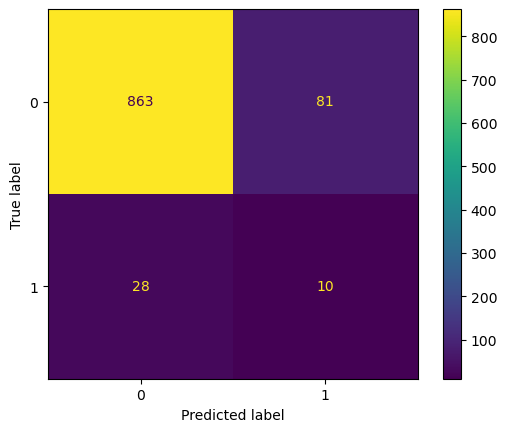

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Train & Evaluate
model_log_reg = LogisticRegression(max_iter=1000)
model_log_reg.fit(X_train_bal, y_train_bal)
evaluate_model(model_log_reg, X_test, y_test)


Accuracy: 0.905295315682281
Precision: 0.07692307692307693
Recall: 0.13157894736842105
F1 Score: 0.0970873786407767
ROC AUC: 0.5340098126672613

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       944
           1       0.08      0.13      0.10        38

    accuracy                           0.91       982
   macro avg       0.52      0.53      0.52       982
weighted avg       0.93      0.91      0.92       982



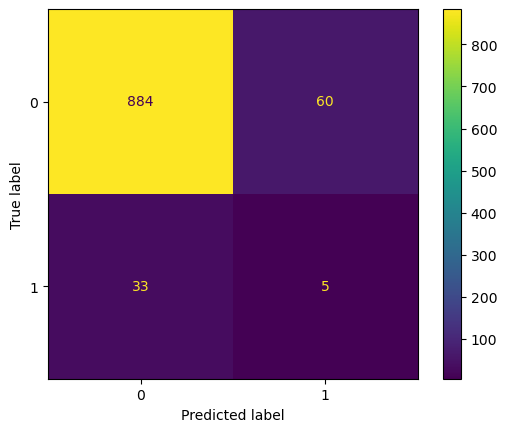

In [18]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train_bal, y_train_bal)
evaluate_model(dt, X_test, y_test)


Accuracy: 0.9266802443991853
Precision: 0.027777777777777776
Recall: 0.02631578947368421
F1 Score: 0.02702702702702703
ROC AUC: 0.6995846342551293

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       944
           1       0.03      0.03      0.03        38

    accuracy                           0.93       982
   macro avg       0.49      0.49      0.49       982
weighted avg       0.92      0.93      0.93       982



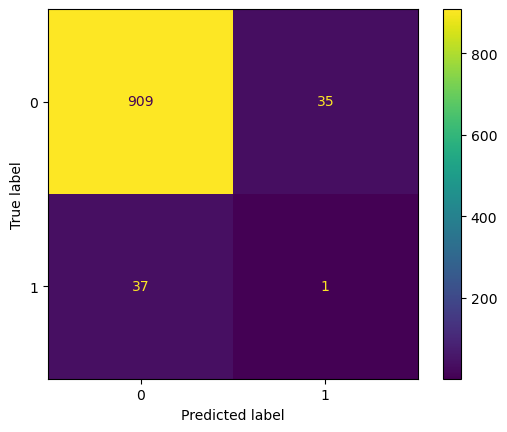

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_bal, y_train_bal)
evaluate_model(rf, X_test, y_test)


Accuracy: 0.7240325865580448
Precision: 0.08540925266903915
Recall: 0.631578947368421
F1 Score: 0.15047021943573669
ROC AUC: 0.7487734165923282

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.73      0.84       944
           1       0.09      0.63      0.15        38

    accuracy                           0.72       982
   macro avg       0.53      0.68      0.49       982
weighted avg       0.95      0.72      0.81       982



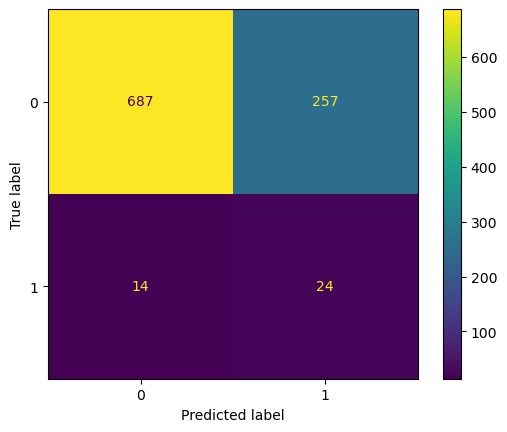

In [20]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_bal, y_train_bal)
evaluate_model(nb, X_test, y_test)


Accuracy: 0.7331975560081466
Precision: 0.07575757575757576
Recall: 0.5263157894736842
F1 Score: 0.13245033112582782
ROC AUC: 0.6842662801070473

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.74      0.84       944
           1       0.08      0.53      0.13        38

    accuracy                           0.73       982
   macro avg       0.53      0.63      0.49       982
weighted avg       0.94      0.73      0.81       982



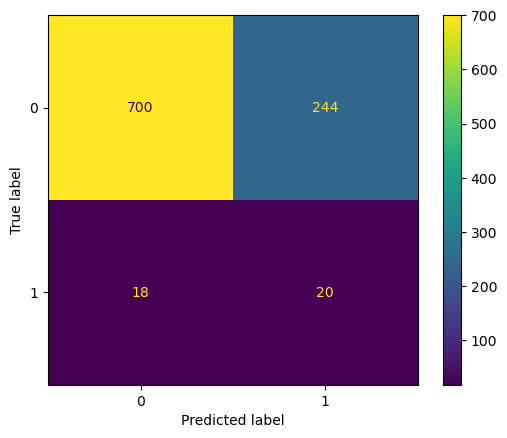

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_bal, y_train_bal)
evaluate_model(knn, X_test, y_test)


Accuracy: 0.615071283095723
Precision: 0.07711442786069651
Recall: 0.8157894736842105
F1 Score: 0.1409090909090909
ROC AUC: 0.7625446030330063

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.61      0.75       944
           1       0.08      0.82      0.14        38

    accuracy                           0.62       982
   macro avg       0.53      0.71      0.45       982
weighted avg       0.95      0.62      0.73       982



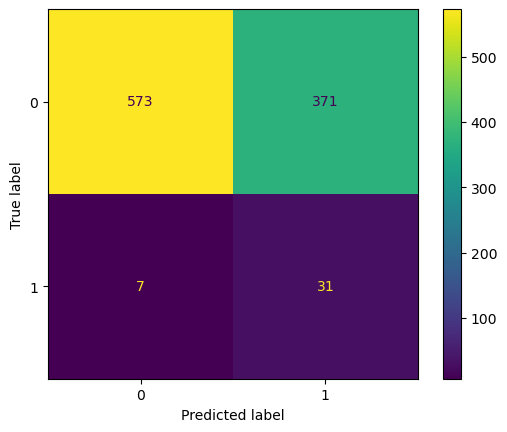

In [22]:
from sklearn.svm import SVC

svm = SVC(probability=True)  
svm.fit(X_train_bal, y_train_bal)
evaluate_model(svm, X_test, y_test)


In [23]:
heart_data.to_csv('cleaned_heart_data.csv', index=False)


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_proba) if y_proba is not None else None
    }


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "SVM (probability=True)": SVC(probability=True)
}


In [26]:
results = {}

for name, model in models.items():
    model.fit(X_train_bal, y_train_bal)
    metrics = evaluate_model(model, X_test, y_test)
    results[name] = metrics


C:\Users\kingl\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
results_df = pd.DataFrame(results).T  # Transpose to get models as rows
results_df = results_df.sort_values(by='F1 Score', ascending=False)
results_df


,Accuracy,Precision,Recall,F1 Score,ROC AUC
Logistic Regression,0.889002,0.109890,0.263158,0.155039,0.734166
Naive Bayes,0.724033,0.085409,0.631579,0.150470,0.748773
SVM (probability=True),0.615071,0.077114,0.815789,0.140909,0.762545
KNN,0.733198,0.075758,0.526316,0.132450,0.684266
Decision Tree,0.900204,0.058824,0.105263,0.075472,0.518733
Random Forest,0.928717,0.029412,0.026316,0.027778,0.686134


In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_train_pred = model.predict(X_train)
y_train_proba = model.predict_proba(X_train)[:, 1] 


train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_proba)

print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print(f"ROC AUC: {train_roc_auc:.4f}")


Training Metrics:
Accuracy: 0.6272
Precision: 0.0947
Recall: 0.8830
F1 Score: 0.1710
ROC AUC: 0.8100


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

logreg = LogisticRegression()
nb = GaussianNB()
svm = SVC(probability=True)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()



In [61]:
import joblib

joblib.dump(logreg, 'logistic_regression_model.pkl')
joblib.dump(nb, 'naive_bayes_model.pkl')
joblib.dump(svm, 'svm_model.pkl')
joblib.dump(knn, 'knn_model.pkl')
joblib.dump(dt, 'decision_tree_model.pkl')
joblib.dump(rf, 'random_forest_model.pkl')


['random_forest_model.pkl']